In [1]:
import numpy as np
from scipy.stats import distributions as dist
import pymc3 as pm
import matplotlib.pyplot as plt
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
n = 100
θ_0 = 1
θ_1 = 0.7
θ_2 = 4
ϵ = np.random.normal(0, 4,n)
x = np.random.uniform(0, 10, n)
y = θ_0 * x ** 2 + θ_1 * x + θ_2 + ϵ ** 2

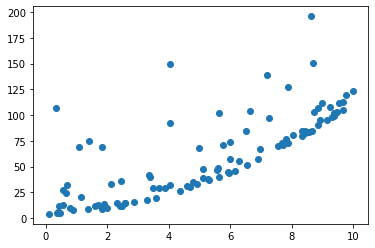

In [7]:
plt.scatter(x,y)
plt.show()

In [8]:
with pm.Model() as Reg_model:
    theta_0 = pm.Normal('zero', mu=0, sd=2)
    theta_1 = pm.Normal('one', mu=0, sd=2)
    theta_2 = pm.Normal('two', mu=0, sd=2)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = pm.Deterministic('μ', theta_0 * x ** 2 + theta_1 * x + theta_2)
    
    #likelihood
    y_obs = pm.Normal('y_obs', mu= μ, sd = ϵ, observed = y)
    
    #trace_Reg = pm.sample(2000, tune=1000)

<ipython-input-8-e7a92ca1be43>:11: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_Reg = pm.sample(2000, tune=1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ϵ, two, one, zero]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1236 seconds.


C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'zero'}>,
        <AxesSubplot:title={'center':'zero'}>],
       [<AxesSubplot:title={'center':'one'}>,
        <AxesSubplot:title={'center':'one'}>],
       [<AxesSubplot:title={'center':'two'}>,
        <AxesSubplot:title={'center':'two'}>],
       [<AxesSubplot:title={'center':'ϵ'}>,
        <AxesSubplot:title={'center':'ϵ'}>]], dtype=object)

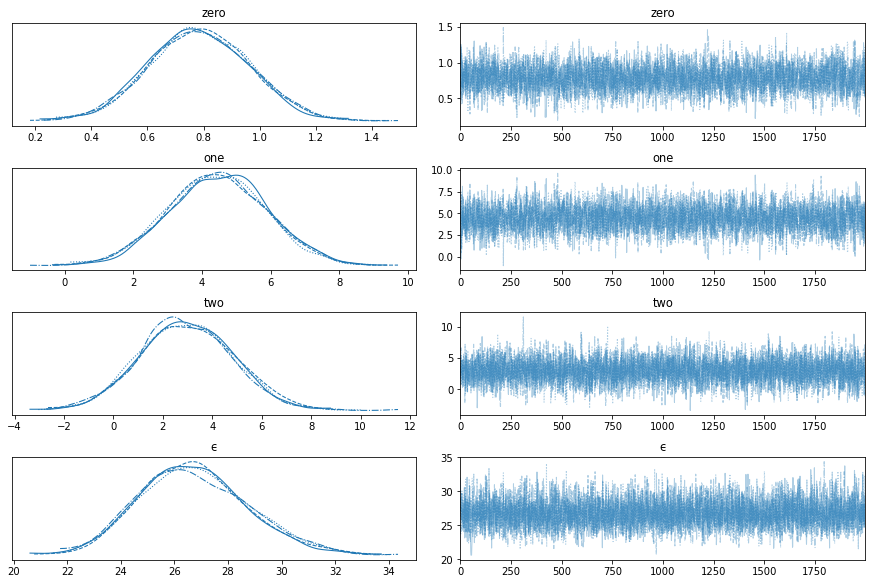

In [9]:
az.plot_trace(trace_Reg, var_names=['zero','one', 'two','ϵ'])

In [10]:
az.summary(trace_Reg[0:4])

C:\ProgramData\Anaconda3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
zero,0.789,0.219,0.525,1.256,0.050,0.036,19.0,19.0,1.34
one,4.259,1.849,-0.255,6.392,0.421,0.303,19.0,19.0,1.05
two,2.868,1.488,0.715,6.591,0.339,0.243,19.0,19.0,0.90
ϵ,27.047,2.465,23.728,31.928,0.562,0.403,19.0,19.0,1.69
μ[0],7.330,2.148,3.969,11.336,0.489,0.351,19.0,19.0,1.09
...,...,...,...,...,...,...,...,...,...
μ[95],51.844,4.308,41.562,59.010,0.982,0.705,19.0,19.0,1.21
μ[96],82.096,3.844,75.312,92.050,0.876,0.629,19.0,19.0,1.18
μ[97],32.987,4.376,22.694,38.809,0.997,0.716,19.0,19.0,1.11
μ[98],43.649,4.419,33.078,49.919,1.007,0.723,19.0,19.0,1.23


In [22]:
y_pred_line = trace_Reg['zero'].mean() * x[:,np.newaxis] ** 2 + trace_Reg['one'].mean() * x[:,np.newaxis] + trace_Reg['two'].mean()

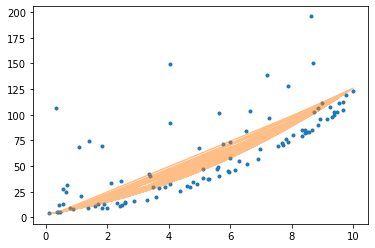

In [25]:
plt.plot(x,y,'.')
plt.plot(x, y_pred_line, alpha = 0.5)
plt.show()